# Classifiers

In statistics and machine learning, classifiers are models that try to identifying which categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations (or instances) whose category membership is known.

Classifiers takes unlabbed data as in input and outputs a label.

## Binary Classifiers

A Binary Classifier is a classifier with only 2 categories. For example a Clasifier which returns "True" or "False" , "Accept" or "Decline", "Malignent" or "Benign".

## Decision Boundary

- a decision Boundary is a line that separates areas into different classes.

In its simplest form a decision boundary separated classes with 2 features , but decision boundaries can be gerated for more features a decision boundary for 5 features would be in 5 dimensional space which would be difficult to draw or visualise.

## Linearly Separable

- a dataset is said to be Linearly separable if it can be perfectly explained by a linear classifier.

## Linear Decision Boundaries

A Linear decision boundary is a decision boundary which is in the form of a straight line dividing the classes.

## Nonlinear decision boundaries

A NonLinear decision boundaries is a decision boundary that does not form a straight line, it could be a smooth curve, a wave, a circle a square or a random shape. 

A nonlinear decision boundary may be none continuous

## Sample Data

There are lots of classic classification datasets that have been used to illustrate.

## Breast Cancer Dataset

569 datapoints with 32 columns, each data point can be classified as Malignant (m) or Benign (b).

From the Wisconsin Breast Cancer Dataset from the UCI machine learning repository.

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

You can predict whether a tumor is malignant or benign based on the features in the dataset. You can even make reasonable predictions on as few as two of the features: the mean radius of the tumor (radius_mean) and its mean number of concave points (concave points_mean).

In [ ]:
# import libraries
import pandas as pd
import numpy as np

# import data
df=pd.read_csv('Data/breast_cancer_data.csv')
print(df.describe())

# create X and y data
X=df[['radius_mean','concave points_mean']]
y=df[['results']]
#y= y.values
#y = y.ravel()

print(X.shape)
print(y.shape)

# set random seed
SEED=np.random.seed(seed=100)

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=SEED)

## Indian Liver Patient dataset

583 observations (rows) with 10 dimensions (columns), each observation can be classified as patient or not a patient (1 or 2).

From the Indian Liver Patient dataset from the UCI machine learning repository. 

https://www.kaggle.com/uciml/indian-liver-patient-records

In [ ]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# import Data
df2=pd.read_csv('data/indian_liver_patient_data.csv')

X=df2[['age','is_male','tot_bilirubin','direct_bilirubin','tot_proteins','albumin','ag_ratio','sgpt','sgot']]
y=df2[['is_patient']]
y= y.values
y = y.ravel()

print(df2.describe())
print(y.shape)
print(X.shape)

# set random seed
SEED=np.random.seed(seed=90)

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=SEED)

## Indian Liver Patient dataset Plot

## Iris dataset

150 observations(rows), and 4 dimensions (columns) each observation can be classified into 1 or 3 classifications of Iris variety.

The Iris dataset is built into the Sklearn library

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [159]:
# import libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import data
df3 = datasets.load_iris()

X= df3['data']
y= df3['target']

print(X.shape)
print(y.shape)

# set random seed
SEED=np.random.seed(seed=1)

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=SEED)

(150, 4)
(150,)


## Iris Dataset Plot

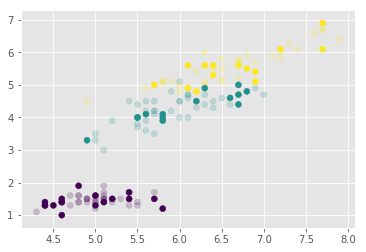

In [157]:
# import Libraries
import matplotlib.pyplot as plt
import pylab

# Plot the training data
xs = X_train[:,0]
ys = X_train[:,2]
plt.scatter(xs, ys,alpha=0.2, c=y_train)
pylab.savefig('Graphs/trainresults.png')

# Plot the test data
xs = X_test[:,0]
ys = X_test[:,2]
plt.scatter(xs, ys, c=y_test)
pylab.savefig('Graphs/testresults.png')

plt.show()

# The Classifiers - Supervised Learning

# Support Vector Machines

## Linear SVC

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

LinearSVC uses Support Vectors to split the space into polygons (areas with straight line decision boundaries) all of the data points within a polygon are assigned the same class.


In sklearn LinearSVC **Linear support vector classifier** works in the same way as the **logistic regression classifier.**

>from sklearn.svm import LinearSVC

### Key hyperparameters

C (inverse regularization strength) - the smaller c the more regularization

kernel (type of kernel)

gamma (inverse smoothness) - only applied to the rbf kernel and the smaller gamma the smoother the decision boundary.

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 2
 0 2 2 2 1 0 0 2]

Accuracy of linear SVC on training set: 0.95
Accuracy of linear svc on test data: 0.933
Time taken to fit and predict SVC: 0.011


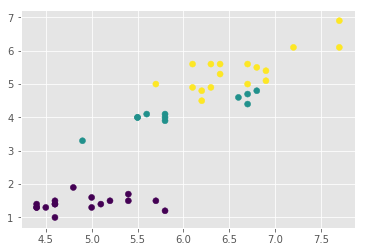

In [214]:
## Linear SVC for iris dataset ##

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import time

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# get starting time
start = time.time()

# instanciate model
clf = LinearSVC(penalty='l2', loss='squared_hinge',
                dual=True, tol=0.0001, C=100, multi_class='ovr',
                fit_intercept=True, intercept_scaling=1, class_weight=None,verbose=0
                , random_state=0, max_iter=1000)

#fit model
clf.fit(X_train,y_train)

# predict
clf_y_pred=clf.predict(X_test)

# get time taken to run the for loop code 
elapsed_time_fl = (time.time() - start) 
#print results
print(clf_y_pred)
# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, clf_y_pred)
print('\nAccuracy of linear SVC on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of linear svc on test data: {:.3f}'.format(accuracy_score(y_test, clf_y_pred)))
print('Time taken to fit and predict SVC: {:.3f}'.format(elapsed_time_fl))
# Plot the results
xs = X_test[:,0]
ys = X_test[:,2]
plt.scatter(xs, ys, c=clf_y_pred)
pylab.savefig('Graphs/linearsvc.png')
plt.show()

## Linear SVC

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

svm.SVC with the linear kernal uses Support Vectors to split the space into polygons (areas with straight line decision boundaries) all of the data points within a polygon are assigned the same class.


### Key hyperparameters

**kernel** string, optional (default=’rbf’)
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable.If none is given, ‘rbf’ will be used.

**decision_function_shape** : ‘ovo’, ‘ovr’, default=’ovr’
Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). However, one-vs-one (‘ovo’) is always used as multi-class strategy.

Number of original examples 105
Number of support vectors 22
[0 0 0 0 0 2 2 0 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 2 0 2 2 2 2 2 0 0 2 2 0 0 2
 0 2 2 2 2 0 0 2]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'versicolor' 'virginica' 'virginica'
 'setosa' 'virginica' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa' 'setosa'
 'virginica']
Accuracy of SVC on training set: 0.99
Accuracy of SVC on test data: 0.978
Time taken to fit and predict Linear SVC: 0.006


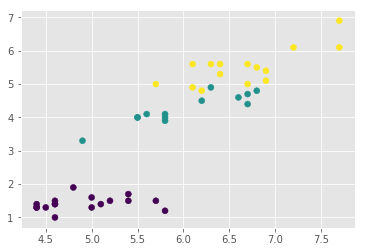

In [213]:
## SVC for iris dataset ##

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import time
plt.style.use('ggplot')

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# get starting time
start = time.time()

# Instanciate classifier
svm = SVC(kernel="linear")

# Train a linear SVM
svm.fit(X_train,y_train)

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X_train))
print("Number of support vectors", len(svm.support_))
X_small = X_train[svm.support_]
y_small = y_train[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_test,y_test)

# predict labels
svm_y_pred=svm_small.predict(X_test)

# get time taken to run the for loop code 
elapsed_time_fl = (time.time() - start) 

#print results
print(y_pred)
print(df3.target_names[svm_y_pred])

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, svm_y_pred)
print('Accuracy of SVC on training set: {:.2f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVC on test data: {:.3f}'.format(accuracy))
print('Time taken to fit and predict Linear SVC: {:.3f}'.format(elapsed_time_fl))

# Plot the results
xs = X_test[:,0]
ys = X_test[:,2]
plt.scatter(xs, ys, c=svm_y_pred)
pylab.savefig('Graphs/svm.png')
plt.show()

## non linear SVM

https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html

nuSVC uses Support Vectors to split the space into non lenear areas (with curved decision boundaries) all of the data points within an area assigned the same class.

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 1 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 2
 0 2 1 2 1 0 0 2]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'versicolor' 'virginica' 'virginica'
 'setosa' 'versicolor' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa' 'setosa'
 'virginica']
Accuracy of nonlinear SVC on training set: 0.95
Accuracy of nonlinear svc on test data: 0.956
Time taken to fit and predict model: 0.011


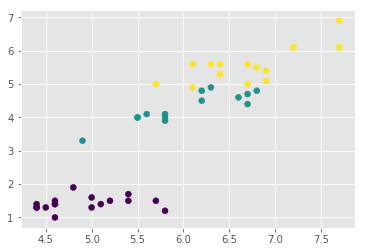

In [212]:
## non linear SVM **

# import libraries
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn import svm
from sklearn.metrics import accuracy_score

# get starting time
start = time.time()

# instanciate the model
nuSVC = svm.NuSVC()
# fit the model
nuSVC.fit(X, y)

# predict
nuSVC_y_pred=nuSVC.predict(X_test)

# get time taken to run the for loop code 
elapsed_time_fl = (time.time() - start) 

#print results
print(nuSVC_y_pred)
print(df3.target_names[nuSVC_y_pred])

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, nuSVC_y_pred)
print('Accuracy of nonlinear SVC on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of nonlinear svc on test data: {:.3f}'.format(accuracy_score(y_test, nuSVC_y_pred)))
print('Time taken to fit and predict model: {:.3f}'.format(elapsed_time_fl))

# Plot the results
xc = X_test[:,0]
yc = X_test[:,2]
plt.scatter(xc, yc, c=nuSVC_y_pred)
pylab.savefig('Graphs/nonlinearsvc.png')
plt.show()

# Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

The logistic function, also called the sigmoid function was developed by statisticians to describe properties of population growth in ecology. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

Logistic regression uses an equation to describe its shape, very much like an equation in used to represent the line of a linear regression.

Input values (x) are combined linearly using weights or coefficient values (referred to as the Greek capital letter Beta) to predict an output value (y). A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) rather than a numeric value.

Below is an example logistic regression equation:

y = e^(b0 + b1*x) / (1 + e^(b0 + b1*x))

Where y is the predicted output, b0 is the bias or intercept term and b1 is the coefficient for the single input value (x). Each column in your input data has an associated b coefficient (a constant real value) that must be learned from your training data.

### Logistic Regression Predicts Probabilities.

Logistic regression models are binary classifiers that calculate the probability of the default class (e.g. the first class).

### Maximum likelihood estimation

The regression coefficients are usually estimated using maximum likelihood estimation.[26] Unlike linear regression with normally distributed residuals, it is not possible to find a closed-form expression for the coefficient values that maximize the likelihood function, so that an iterative process must be used instead; for example Newton's method. This process begins with a tentative solution, revises it slightly to see if it can be improved, and repeats this revision until no more improvement is made, at which point the process is said to have converged

### Least squares: the squared loss

SKLearn LinearRegression minimizes a loss using the least squares method which sums all the the squares of the errors where the error is the difference between the value and the predicted value.


## Regularization

When fitting a model to training data there is a danger that if you try to over optomise the model you can overfit the training data, in this case the model will score very highly on the specific training data but not as well on test data fit Regularization is a method of preventing over fitting of a model, so that it performs optimally on unseen data.

## L1 vs. L2 regularization

Lasso = linear regression with L1 regularization Ridge = linear regression with L2 regularization

For other models like logistic regression we just say L1, L2, etc.

### Tips on preparing data for best results

Remove Noise: Logistic regression assumes no error in the output variable (y), consider removing outliers and possibly misclassified instances from your training data.

Gaussian Distribution: Logistic regression is a linear algorithm (with a non-linear transform on output). It does assume a linear relationship between the input variables with the output. Data transforms of your input variables that better expose this linear relationship can result in a more accurate model. For example, you can use log, root, Box-Cox and other univariate transforms to better expose this relationship.

Remove Correlated Inputs: Like linear regression, the model can overfit if you have multiple highly-correlated inputs. Consider calculating the pairwise correlations between all inputs and removing highly correlated inputs.

Fail to Converge: It is possible for the expected likelihood estimation process that learns the coefficients to fail to converge. This can happen if there are many highly correlated inputs in your data or the data is very sparse (e.g. lots of zeros in your input data).

## Key hyperparameters in sklearn:

C (inverse regularization strength) - the smaller c the more regularization

penalty (type of regularization) - L1 and L2 are supported

multi_class (type of multi-class)

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 1
 0 2 1 2 1 0 0 2]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'versicolor' 'virginica' 'virginica'
 'setosa' 'virginica' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa' 'setosa'
 'virginica']
Accuracy of Logistic Regressiom: 1.000
Time taken to fit and predict model: 0.009


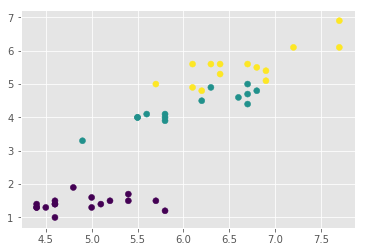

In [211]:
## Logistic Regression ##

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import time

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# get starting time
start = time.time()

# instanciate model
lr = LogisticRegression(C=1)

# fit model
lr.fit(X_train, y_train)

# make predictions
lr_y_pred=lr.predict(X_test)

# get time taken to run the for loop code 
elapsed_time_fl = (time.time() - start) 

# evaluate predictions
lr.score(X_test, y_test)

# print predictions
print(lr_y_pred)
print(df3.target_names[lr_y_pred])

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test,lr_y_pred)

print('Accuracy of Logistic Regressiom: {:.3f}'.format(accuracy_score(y_test,lr_y_pred)))
print('Time taken to fit and predict model: {:.3f}'.format(elapsed_time_fl))


# Plot the results
xs = X_test[:,0]
ys = X_test[:,2]
plt.scatter(xs, ys, c=lr_y_pred)
pylab.savefig('Graphs/logisticregression.png')
plt.show()

## Multi-class logistic regression

While Logistic regression is used for Binary Classification we can also used Sklearn to perform Multi-class classification (multiclass classification involves having 2 or more classes). There are several ways that logistic regression can accomplish this, for example one-versus-rest or multinomial/softmax.

### one-vs-rest

With one-versus-rest you create a range of binary classifiers one for each possible classification. Each classifier asks is the data point in this category yes or not in this category, you then compare the results of each of this classifiers and go with the classifier with the highest score.

Compare outputs
4.123770834319505
-1.8610170150612242
-11.322595276864728
[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 1
 0 2 1 2 1 0 0 2]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'versicolor' 'virginica' 'virginica'
 'setosa' 'virginica' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa' 'setosa'
 'virginica']
Accuracy of Logistic Regressiom on training data: 1.000
Accuracy of Multi Class Logistic Regressiom: 1.000
Time taken to fit and predict model: 0.011


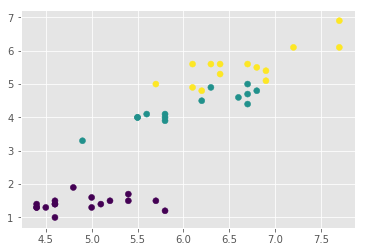

In [210]:
## one-vs-rest Logistic Regression ##

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import time

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# get starting time
start = time.time()

# instanciate a model for each category
lr=LogisticRegression()
lr0 = LogisticRegression()
lr1 = LogisticRegression()
lr2 = LogisticRegression()

# fit each of the models
lr0.fit(X,y==0)
lr1.fit(X,y==1)
lr2.fit(X,y==2)

#compare raw outputs
print("Compare outputs")
print(lr0.decision_function(X)[0]) # get raw model output
print(lr1.decision_function(X)[0]) # get raw model output
print(lr2.decision_function(X)[0]) # get raw model output

# fit model
lr.fit(X_train, y_train)

# make predictions
mcrc_y_pred=lr.predict(X_test)

# get time taken to run the for loop code 
elapsed_time_fl = (time.time() - start) 

# evaluate predictions
lr.score(X_test, y_test)

# print predictions
print(mcrc_y_pred)
print(df3.target_names[mcrc_y_pred])

# Evaluate and print test-set accuracy
accuracy_train = accuracy_score(y_train, y_train)
# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, mcrc_y_pred)

print('Accuracy of Logistic Regressiom on training data: {:.3f}'.format(accuracy_train))
print('Accuracy of Multi Class Logistic Regressiom: {:.3f}'.format(accuracy_score(y_test, mcrc_y_pred)))
print('Time taken to fit and predict model: {:.3f}'.format(elapsed_time_fl))

# Plot the results
xs = X_test[:,0]
ys = X_test[:,2]
plt.scatter(xs, ys, c=mcrc_y_pred)
pylab.savefig('Graphs/lr1versusrest.png')
plt.show()

### softmax/multinomial

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 2
 0 2 1 2 1 0 0 2]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'versicolor' 'virginica' 'virginica'
 'setosa' 'virginica' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa' 'setosa'
 'virginica']
Accuracy of Multi Class Logistic Regressiom: 0.978
Time taken to fit and predict model: 0.063


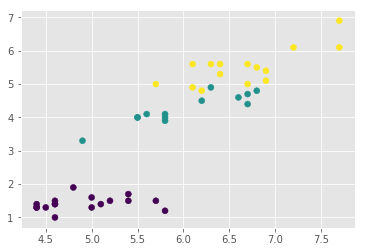

In [209]:
## Softmax Logistic Regression ##

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import time

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# get starting time
start = time.time()

# instanciate model
lr = LogisticRegression(multi_class="multinomial",solver="lbfgs")

# fit model
lr.fit(X_train, y_train)

# make predictions
sm_y_pred=lr.predict(X_test)

# get time taken to run the for loop code 
elapsed_time_fl = (time.time() - start) 

# evaluate predictions
lr.score(X_test, y_test)

# print predictions
print(sm_y_pred)
print(df3.target_names[sm_y_pred])

# Evaluate and print test-set accuracy

#print("Softmax training accuracy:", lr.score(X_train, y_train))
print('Accuracy of Multi Class Logistic Regressiom: {:.3f}'.format(accuracy_score(y_test, sm_y_pred)))
print('Time taken to fit and predict model: {:.3f}'.format(elapsed_time_fl))

# Plot the results
xs = X_test[:,0]
ys = X_test[:,2]
plt.scatter(xs, ys, c=sm_y_pred)
pylab.savefig('Graphs/lr_softmax.png')
plt.show()

## Gaussian Process Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html#sklearn.gaussian_process.GaussianProcessClassifier



## SGDClassifier

the SGDClassifier (Stochastic Gradient Descent) scales well to large datasets, and supports both logistic regression and support vectors simply by  defining the loss type. 

On makes binary classification

Example:

from sklearn.linear_model import SGDClassifier

logreg = SGDClassifier(loss='log')

linsvm = SGDClassifier(loss='hinge')

With the SGDClassifier hyperparameter alpha is like 1/C in logistic regression and svm. Unlike c higher alpha values mean More not less regularization.

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


[0 0 0 0 0 2 2 0 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 2 0 2 2 2 2 2 0 0 2 2 0 0 2
 0 2 2 2 2 0 0 2]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'virginica'
 'setosa' 'virginica' 'virginica' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'setosa' 'virginica' 'virginica' 'virginica'
 'setosa' 'virginica' 'virginica' 'virginica' 'virginica' 'setosa'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'setosa'
 'setosa' 'virginica' 'virginica' 'setosa' 'setosa' 'virginica' 'setosa'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'virginica']
SGD training accuracy: 0.6571428571428571
SGD test accuracy    : 0.6888888888888889
Time taken to fit and predict model: 0.004


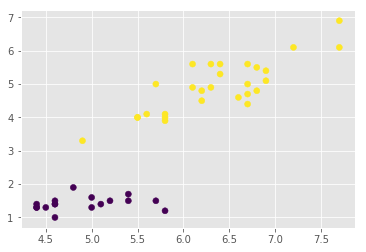

In [208]:
## SGDClassifier ##

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import time

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# get starting time
start = time.time()

# instanciate classifier and set random_state=0 for reproducibility 
SGD = SGDClassifier(random_state=0)

#fit model
SGD.fit(X_train, y_train)

# make predictions
y_pred=SGD.predict(X_test)

# get time taken to run the for loop code 
elapsed_time_fl = (time.time() - start) 

# evaluate predictions
SGD.score(X_test, y_test)

# print predictions
print(y_pred)
print(df3.target_names[y_pred])

# Evaluate and print test-set accuracy

print("SGD training accuracy:", SGD.score(X_train, y_train))
print("SGD test accuracy    :", SGD.score(X_test, y_test))
print('Time taken to fit and predict model: {:.3f}'.format(elapsed_time_fl))

# Plot the results
xs = X_test[:,0]
ys = X_test[:,2]
plt.scatter(xs, ys, c=y_pred)
pylab.savefig('Graphs/SGD.png')
plt.show()

## k-Nearest Neighbors

k-Nearest Neighbors plots datapoints and then classifies any unlabled point by looking at a given number of its nearest neighbors and giving the unabbed point the same label as the most commonly occuring label of the neighbors.

>Example
> ### Import Library
>from sklearn.neighbors import KNeighborsClassifier
> ### creative classifier
>knn = KNeighborsClassifier(n_neighbors=6)
> ### fit classifier
>knn.fit(df['data'], df['target'])

>KNeighborsClassifier(algorithm='auto', leaf_size=30,metric='minkowski',metric_params=None, n_jobs=1,n_neighbors=6, p=2,weights='uniform')
> ### pridict training data
>prediction = knn.predict(df[data])
> ### preict unlabbed data
>new_prediction = knn.predict(new_data)

### Model complexity

In k nearest neightbour classifiers we can use **decision boundaries** to help classify data.

Generally more complex models run the risk of being over sensative to noise in the specific data you have rather than general trends in the data this is known as **overfitting**.

If you increase k even more and make the model will perform even worse on both the trainng and test data, this is known as **underfitting**

You can plot model complexity showing the accuracy of the training data and the test data, this is know as a **model complexity curve**. The optomum accuracy is somewhere between the overfitting and underfitting positions. 

Larger k = smoother decision boundary = less complex model 

Smaller k = more complex model = can lead to overfitting

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 2
 0 2 1 2 1 0 0 2]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'virginica' 'virginica'
 'setosa' 'virginica' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa' 'setosa'
 'virginica']
Accuracy of k-Nearest Neighbors on training data: 0.962
Accuracy of k-Nearest Neighbors: 0.956
Time taken to fit and predict model: 0.013


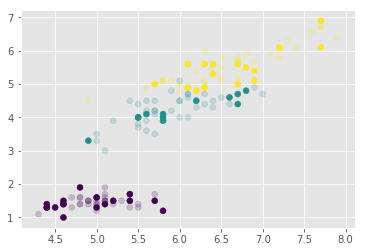

In [206]:
## k-Nearest Neighbors for iris dataset ##

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import time
plt.style.use('ggplot')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# get starting time
start = time.time()

# instaciate classifier
knn = KNeighborsClassifier(n_neighbors=6)

# Fit model
knn.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30,metric='minkowski',metric_params=None, n_jobs=1,n_neighbors=6, p=2,weights='uniform')

## Predicting on training data ##
nn_y_pred_train=knn.predict(X_train)
## Predicting on unlabeled data ##
nn_y_pred = knn.predict(X_test)

# get time taken to run the for loop code 
elapsed_time_fl = (time.time() - start) 

print(nn_y_pred)
print(df3.target_names[nn_y_pred])

# Evaluate and print test-set accuracy
accuracy_train = accuracy_score(y_train,nn_y_pred_train)
# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, nn_y_pred)

print('Accuracy of k-Nearest Neighbors on training data: {:.3f}'.format(accuracy_train))
print('Accuracy of k-Nearest Neighbors: {:.3f}'.format(accuracy_score(y_test, nn_y_pred)))
print('Time taken to fit and predict model: {:.3f}'.format(elapsed_time_fl))

# Plot the results
xs = X_test[:,0]
ys = X_test[:,2]
plt.scatter(xs, ys, c=nn_y_pred)
pylab.savefig('Graphs/k-nearestneighbours.png')

# Plot the training data
xs = X_train[:,0]
ys = X_train[:,2]
plt.scatter(xs, ys,alpha=0.2, c=y_train)

plt.show()


# Tree Based Classifiers

## Classification Trees

A Classification Tree is a kind of Decision Trees which is a sequence of if-else questions about individual features used to infer a class labels.

Decision Trees are able to capture non-linear relationships between features and labels.

Decision Trees don't require feature scaling (ex: Standardization, ..)

The key Arguments are **max_depth** which determines how many questions are asked (how many levels there are).

**min_samples_leaf** which determines the minimum number of observations in any given leaf.

**Random_state**

## Evaluatation

The mean squared error can used to evaluate the model

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2 2 0 2 2 1 1 1 0 0 2 1 0 0 2
 0 2 1 2 1 0 0 2]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'virginica' 'virginica'
 'setosa' 'virginica' 'virginica' 'virginica' 'virginica' 'setosa'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa' 'setosa'
 'virginica']
RMSE of Classification Tree: 0.26
Accuracy of Decision Tree Classifier: 0.933
Time taken to fit and predict model: 0.002


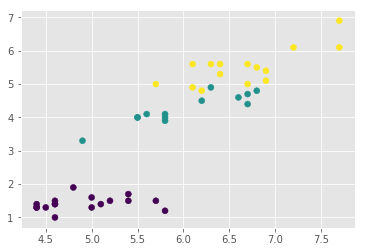

In [205]:
## Decision Treee with Entropy ##

# Import Libraries
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import time
plt.style.use('ggplot')

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

# get starting time
start = time.time()

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=3)

# Instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeClassifier(max_depth=2, min_samples_leaf=0.1,random_state=3)

# Fit 'dt' to the training-set
dt.fit(X_train, y_train)

# Predict test-set labels
ct_y_pred = dt.predict(X_test)

# get time taken to run the for loop code 
elapsed_time_fl = (time.time() - start) 

# print labels
print(ct_y_pred)

print(df3.target_names[ct_y_pred])

# Compute mse_dt
mse_dt = MSE(ct_y_pred,y_test)

# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)

# Print rmse_dt
print("RMSE of Classification Tree: {:.2f}".format(rmse_dt))

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, ct_y_pred)

print('Accuracy of Decision Tree Classifier: {:.3f}'.format(accuracy_score(y_test, ct_y_pred)))
print('Time taken to fit and predict model: {:.3f}'.format(elapsed_time_fl))

xs = X_test[:,0]
ys = X_test[:,2]
plt.scatter(xs, ys, c=y_pred)
pylab.savefig('Graphs/regressiontree.png')
plt.show()

## Classification Trees with entropy / gini criterion

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2 2 0 2 2 1 1 1 0 0 2 1 0 0 1
 0 2 1 2 1 0 0 2]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'virginica' 'virginica'
 'setosa' 'virginica' 'virginica' 'virginica' 'virginica' 'setosa'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa' 'setosa'
 'virginica']
RMSE of Classification Tree entropy: 0.21
Accuracy achieved by using entropy: 0.956


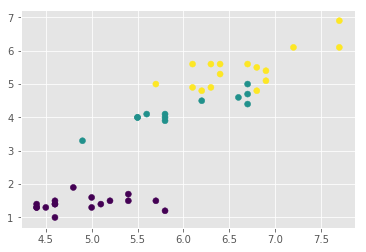

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'virginica' 'virginica'
 'setosa' 'virginica' 'virginica' 'virginica' 'virginica' 'setosa'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa' 'setosa'
 'virginica']
[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2 2 0 2 2 1 1 1 0 0 2 1 0 0 2
 0 2 1 2 1 0 0 2]
RMSE of Classification Tree gini: 0.26
Accuracy achieved by using gini: 0.933
Time taken to fit and predict model: 0.054


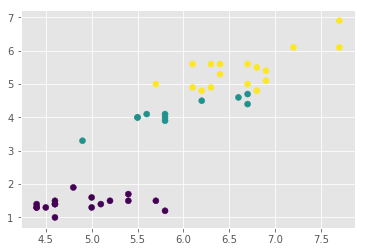

In [200]:
## Decision Tree ##

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE

# get starting time
start = time.time()

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=3)

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Instantiate dt, set 'criterion' to 'gini'
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=1)

# Fit 'dt' to the training-set
dt_entropy.fit(X_train, y_train)
dt_gini.fit(X_train, y_train)

# Predict test-set labels
ent_y_pred = dt_entropy.predict(X_test)
gini_y_pred = dt_gini.predict(X_test)

# get time taken to run the for loop code 
elapsed_time_fl = (time.time() - start) 

# Compute mse_dt
mse_dt = MSE(ent_y_pred,y_test)

# Compute mse_dt
mse_dt = MSE(ent_y_pred,y_test)

# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)

# Evaluate accuracy
accuracy_entropy = accuracy_score(y_test, ent_y_pred)

# print results
print(ent_y_pred)
print(df3.target_names[ent_y_pred])

# Print rmse_dt
print("RMSE of Classification Tree entropy: {:.2f}".format(rmse_dt))

# Print accuracy
print('Accuracy achieved by using entropy: {:.3f}'.format(accuracy_score(y_test, ent_y_pred)))

# plot results
xs = X_test[:,0]
ys = X_test[:,2]
plt.scatter(xs, ys, c=ent_y_pred)
pylab.savefig('Graphs/decisiontree.png')
plt.show()

# Compute mse_dt
print(df3.target_names[gini_y_pred])

# Compute mse_dt
mse_dt2 = MSE(gini_y_pred,y_test)

# Compute rmse_dt
rmse_dt2 = mse_dt2 ** (1/2)

# Evaluate accuracy
accuracy_gini = accuracy_score(y_test, gini_y_pred)

# print labels
print(gini_y_pred)

# Print rmse_dt
print("RMSE of Classification Tree gini: {:.2f}".format(rmse_dt2))

# Print accuracy
print('Accuracy achieved by using gini: {:.3f}'.format(accuracy_score(y_test, gini_y_pred)))
print('Time taken to fit and predict model: {:.3f}'.format(elapsed_time_fl))

# plot results
xs = X_test[:,0]
ys = X_test[:,2]
plt.scatter(xs, ys, c=gini_y_pred)
pylab.savefig('Graphs/decisiontree2.png')
plt.show()

## Bootstrap Aggregation or Bagging

Bootstrapping is a way of creating new data sets based on random sampling with replacement of a dataset.

Bootstrap Aggregation or Bagging is an ensemble method using one tree based algorithm on various subsets of the training data.

Bagging reduces the variance of individual models in the ensemble.

Bootstapping allows assigning measures of accuracy, defined in terms of bias, variance, confidence intervals, prediction error or some other such measure based on real data without having to re run real tests over and over again.

BaggingClassifier aggregates predictions based on majority voting.

>from sklearn.ensemble import BaggingClassifier

Accuracy of Decission Tree: 0.933
[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 2
 0 2 1 2 1 0 0 2]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'virginica' 'virginica'
 'setosa' 'virginica' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa' 'setosa'
 'virginica']
Accuracy of Bagging Classifier: 0.956
Time taken to fit and predict model: 0.002


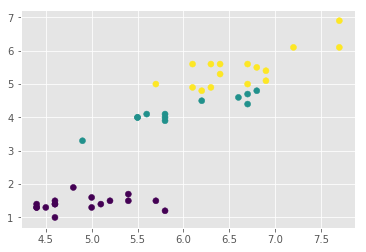

In [204]:
## Boostrap Decision Tree classification ##

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import time
plt.style.use('ggplot')

# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# get starting time
start = time.time()

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=3)

# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16,random_state=SEED)

# calculate accuracy of decision Tree
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)

# get time taken to run the for loop code 
elapsed_time_fl = (time.time() - start) 

# evaluate accuracy
accuracy1 = accuracy_score(y_test, dt_y_pred)
print('Accuracy of Decission Tree: {:.3f}'.format(accuracy_score(y_test, dt_y_pred)))

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)

# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict test set labels
bc_y_pred = bc.predict(X_test)

# print results
print(bc_y_pred)
print(df3.target_names[bc_y_pred])

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, bc_y_pred)

print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy_score(y_test, bc_y_pred)))
print('Time taken to fit and predict model: {:.3f}'.format(elapsed_time_fl))

# plot results
xs = X_test[:,0]
ys = X_test[:,2]
plt.scatter(xs, ys, c=bc_y_pred)
pylab.savefig('Graphs/bagging.png')
plt.show()

## Out of Bag Evaluation

In bagging we use replacement, so the same instance may be sampled several times in one model, but if some instances are samples multiple times it means that some instances are not sampled at all in a model.

On average, for each model, 63% of the training instances are sampled.

The remaining 37% constitute the OOB or 'Out of Bag' instances.

Because OOB instances are not seen by the model, they are ideal candidates to use estimate the performance of the model,without the need for cross validation.

For a given bootstrap n models are produced each model some of the instances are used in the sample the remaining  instances are used to evaluate the model, the oob score for the bagging ensemble is calulated by averaging the oob score for each of the models in the bbagging ensemble.

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 2
 0 2 1 2 1 0 0 2]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'versicolor' 'virginica' 'virginica'
 'setosa' 'virginica' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa' 'setosa'
 'virginica']
Test set accuracy: 0.978
OOB accuracy: 0.933
Time taken to fit and predict model: 1.216


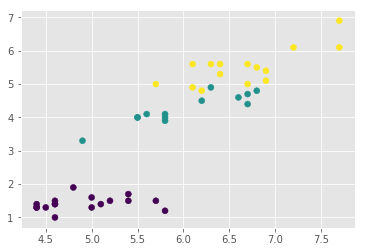

In [203]:
## Out of Bag evaluation of Decision Tree classification ##

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import time
plt.style.use('ggplot')

# Import models and split utility function
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# get starting time
start = time.time()

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=3)

# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4,min_samples_leaf=0.16, random_state=SEED)

# Instantiate a BaggingClassifier 'bc'; set oob_score= True 
bc = BaggingClassifier(base_estimator=dt, n_estimators=300,oob_score=True, n_jobs=-1)

# Fit 'bc' to the traing set
bc.fit(X_train, y_train)

# Predict the test set labels
oob_y_pred = bc.predict(X_test)

# get time taken to run the for loop code 
elapsed_time_fl = (time.time() - start) 

# print results
print(oob_y_pred)
print(df3.target_names[oob_y_pred])
    
# Evaluate test set accuracy
test_accuracy = accuracy_score(y_test, oob_y_pred)
    
# Extract the OOB accuracy from 'bc'
oob_accuracy = bc.oob_score_

# Print test set accuracy
print('Test set accuracy: {:.3f}'.format(accuracy_score(y_test, oob_y_pred)))

# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(bc.oob_score_))
print('Time taken to fit and predict model: {:.3f}'.format(elapsed_time_fl))


# plot results
xs = X_test[:,0]
ys = X_test[:,2]
plt.scatter(xs, ys, c=oob_y_pred)
pylab.savefig('Graphs/oobbagging.png')
plt.show()

## Random Forest

Random Forest is an ensemble method, similar to bagging.

Random Forest uses only Decision Trees as base estimators.

In Randow Forest each estimator is trained on a different bootstrap sample the same size as the training set

Random Forest introduces further randomization in the training of individual trees.

d features are sampled at each node without replacement

The default number of features d is the square root of the total number of features. So if you had 100 features d would be 10 by default. ie 10 features would be sampled at each node without replacement.

Once trained, we can predict on new instances. The new instances are fed to each of the base estimators, each estimator (decision trees) makes predictions and passes them to the Random Forest meta model and a final decision is made.

Random Forest Classification Aggregates predictions using majority voting

>from sklearn.ensemble import RandomForestClassifier

Generally a Random Forest will produce results with a lower variance than a single Classification Tree.

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 2
 0 2 1 2 1 0 0 2]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'versicolor' 'virginica' 'virginica'
 'setosa' 'virginica' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa' 'setosa'
 'virginica']
Accuracy achieved by using Random Forest:  0.9777777777777777
Test set RMSE of rf: 0.15
Time taken to fit and predict model: 0.902


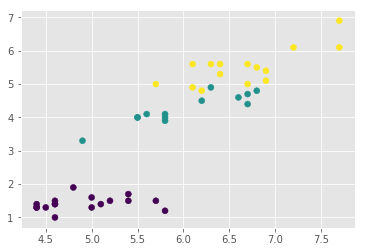

In [202]:
## Random Forest Classification ##

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import time
plt.style.use('ggplot')

# Import models and split utility function
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE

# get starting time
start = time.time()

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=3)

# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestClassifier(n_estimators=400, min_samples_leaf=0.12,random_state=SEED)

# Fit 'rf' to the training set
rf.fit(X_train, y_train)

# Predict the test set labels 'rf_y_pred'
rf_y_pred = rf.predict(X_test)

# get time taken to run the for loop code 
elapsed_time_fl = (time.time() - start) 

# print results
print(rf_y_pred)
print(df3.target_names[rf_y_pred])

# Evaluate accuracy
accuracy = accuracy_score(y_test, rf_y_pred)

# Print accuracy
print('Accuracy achieved by using Random Forest: ', accuracy_score(y_test, rf_y_pred))

# Evaluate the test set RMSE
rmse_test = MSE(y_test, rf_y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
print('Time taken to fit and predict model: {:.3f}'.format(elapsed_time_fl))

# plot results
xs = X_test[:,0]
ys = X_test[:,2]
plt.scatter(xs, ys, c=rf_y_pred)
pylab.savefig('Graphs/randomforest.png')
plt.show()

## Random Forests Feature Importance

When a Tree based method is trained the predictive power of a feature can be assessed using

>feature_importance_

this is expressed as a percentage, indicating the wait of that feature in training and prediction.

To visualize the importance of features you can create a pandas series of feature importances and display this with matplotlib.

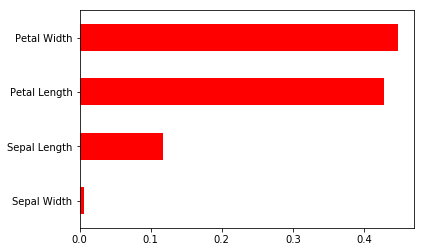

In [62]:
## Random Forest Classification ##

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab

# Import models and split utility function
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE

# Set seed for reproducibility
SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=SEED)

# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestClassifier(n_estimators=400, min_samples_leaf=0.12,random_state=SEED)

# Fit 'rf' to the training set
rf.fit(X_train, y_train)

# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Create a pd.Series of features importances
X=pd.read_csv('Data/irisdata.csv')
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)

# Sort importances_rf                                   
sorted_importances_rf = importances_rf.sort_values()       

# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh',color='red')
plt.show()

## Adaboost

## Gadient Boosting

## Stochastic Gradient Boosting (SGB)

# The Classifiers - Unsupervised Learning¶

## k-means clustering (sklearn)

[0 1 1 2 2 1 0 2 1 2 2 1 2 2 1 2 0 1 0 0 0 2 2 1 0 0 2 0 0 1 1 1 0 2 1 2 2
 2 0 1 2 0 1 1 1]
['setosa' 'versicolor' 'versicolor' 'virginica' 'virginica' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'virginica' 'virginica' 'versicolor'
 'virginica' 'virginica' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'virginica' 'versicolor' 'virginica' 'virginica'
 'virginica' 'setosa' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'versicolor' 'versicolor']
-27.494783620625604
Accuracy of kmeans Classifier: 0.356


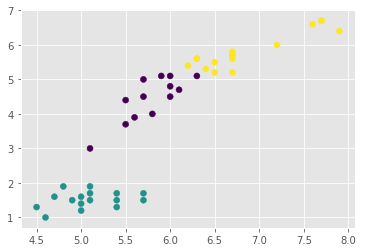

In [103]:
## k-means clustering for iris dataset ##

#import libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pylab

# set random seed
SEED=np.random.seed(seed=90)

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X3,y3,test_size=0.3, random_state=SEED)

# instanciate model
kmeans = KMeans(n_clusters=3)

# fit model
kmeans.fit(X_train,y_train)

# create Labels
kmlabels = kmeans.predict(X_test)

# print labels
print(kmlabels)

print(iris.target_names[kmlabels])

## test accuracy
print(kmeans.score(X_test, kmlabels))

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, kmlabels)

print('Accuracy of kmeans Classifier: {:.3f}'.format(accuracy))

x2 = X_test[:,0]
y2 = X_test[:,2]
plt.scatter(x2, y2, c=kmlabels)
pylab.savefig('Graphs/k-means.png')
plt.show()

## k-means clustering (scipy)

## hierarchical clustering  (sklearn)

## hierarchical clustering  (scipy)

## t-distributed stochastic neighbor embedding - t-SNE (sklearn) 

# The Classifiers - Deep Learning

## categorical_crossentropy loss function 

# Comparing the Results

Just as each dataset is different the results of the running different classifier on different datasets will vary largely. Its not a case of there being a best classifier or even best hyper parameters, but a best classifier for a particular dataset, and even then this may vary over time as new data is generated.

While the different classifiers all perform the same task - Classification they sometimes do it in different ways and different parameter can make a big difference to the way they function. The amount of time different classification models take to proces can be very different. on very small dataset this might not matter too much but as this is scaled it could become a problem. It is worth timing each process so that if you have several models with very simiar results you can take the one that processes the fastest.

In [187]:
print('Accuracy of linearsvc on test data: {:.3f}'.format(accuracy_score(y_test, clf_y_pred)))
print('Accuracy of linear svc on test data: {:.3f}'.format(accuracy_score(y_test, svm_y_pred)))
print('Accuracy of nonlinear svc on test data: {:.3f}'.format(accuracy_score(y_test, nuSVC_y_pred)))
print('Accuracy of Logistic Regressiom: {:.3f}'.format(accuracy_score(y_test,lr_y_pred)))
print('Accuracy of Multi Class Logistic Regressiom (one versus rest): {:.3f}'.format(accuracy_score(y_test, mcrc_y_pred)))
print('Accuracy of Multi Class Logistic Regressiom (softmax): {:.3f}'.format(accuracy_score(y_test, sm_y_pred)))
# Gausian
# SGDI
print('Accuracy of k-Nearest Neighbors: {:.3f}'.format(accuracy_score(y_test, nn_y_pred)))
print('Accuracy of Decision Tree Classifier: {:.3f}'.format(accuracy_score(y_test, ct_y_pred)))
print('Accuracy achieved by using entropy: {:.3f}'.format(accuracy_score(y_test, ent_y_pred)))
print('Accuracy achieved by using gini: {:.3f}'.format(accuracy_score(y_test, gini_y_pred)))
print('Accuracy of Decission Tree: {:.3f}'.format(accuracy_score(y_test, dt_y_pred)))
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy_score(y_test, bc_y_pred)))
print('Accuracy of of Out of Bag Classifier: {:.3f}'.format(bc.oob_score_))
print('Accuracy achieved by using Random Forest: ', accuracy_score(y_test, rf_y_pred))
# Adaboost
# Gradient Boosting
# Stochastic Gradient Boosting (SGB)


Accuracy of linearsvc on test data: 0.933
Accuracy of linear svc on test data: 0.978
Accuracy of nonlinear svc on test data: 0.956
Accuracy of Logistic Regressiom: 1.000
Accuracy of Multi Class Logistic Regressiom (one versus rest): 1.000
Accuracy of Multi Class Logistic Regressiom (softmax): 0.978
Accuracy of k-Nearest Neighbors: 0.956
Accuracy of Decision Tree Classifier: 0.933
Accuracy achieved by using entropy: 0.956
Accuracy achieved by using gini: 0.933
Accuracy of Decission Tree: 0.933
Accuracy of Bagging Classifier: 0.978
Accuracy of of Out of Bag Classifier: 0.933
Accuracy achieved by using Random Forest:  0.9777777777777777


# Visualising the different Classifiers

While I have put individual code in for each model up until now in the notebook (so that it can be individually copied and used), you can create a list of classifiers and parameter and loop over them to find the best classifier for your data. In real world situations that would be a far more elegant way to do it. 

The following code is taken from the sklearn documentation at https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html and it provides a heat map for each classifier that show the sorts of data pattern that that classifier may be best at identifying,

Automatically created module for IPython interactive environment


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


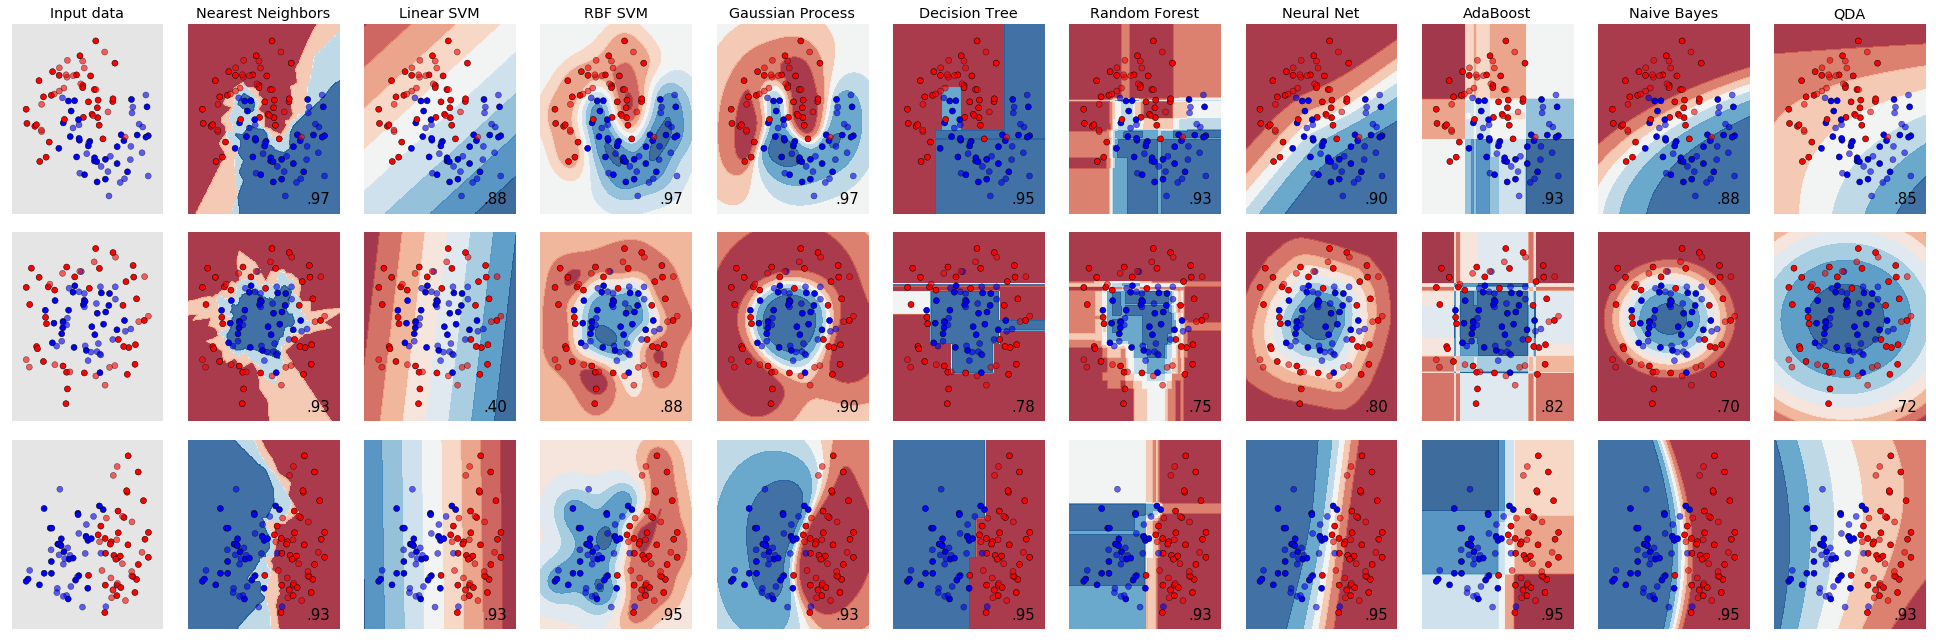

In [215]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()